# Reto: Predicción de BD de Titanic de Kaggle

A través del siguiente programa buscamos predecir si un pasajero a bordo del Titanic tendría posibilidades de sobrevivir dadas ciertas condiciones.

Estaremos utilizando un dataset de Kaggle que se puede encontrar en el siguiente link: https://www.kaggle.com/competitions/titanic

Para empezar, haremos una limpieza de los datos con la finalidad de que el modelo que planteemos pueda aprender de mejor forma y haremos ciertas gráficas y cálculos estadísticos para familiarizarnos de mejor forma y representar los datos de la base de datos.trabajaremos con la limpieza del conjunto de datos. Primeramente, importaremos los datos al entorno de Google Colab, para trabajar con un entorno. Procederemos a eliminar algunas variables que no tendran uso para el modelo que propondremos, asi como crear otras que consideramos importantes y que obtuvimos de la misma base de datos. Aplicamos unas tranformaciones y con eso estaremos listos para trabajar con los datos.


## Extraer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files,drive

drive.mount("/content/gdrive/")  
!pwd
!ls

%cd "/content/gdrive/Shareddrives/Concentracion_AI/Titanic"
!ls

Mounted at /content/gdrive/
/content
gdrive	sample_data
/content/gdrive/Shareddrives/Concentracion_AI/Titanic
'Exploracion Andrea.ipynb'   gender_submission.csv	   train.csv
 Exploracion_Edu.ipynb	    'Observaciones Titanic.gdoc'   train.gsheet
 Exploracion.ipynb	     test.csv


Lectura de datos y almacenamiento en un DataFrame.

In [ ]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Se usa un describe para conocer información general acerca de los datos.

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Con el objetivo de verificar si existen registros duplicados en la base de datos, eliminamos los duplicados y observamos los datos que quedan posterior a ello.

In [ ]:
titanic = titanic.drop_duplicates()
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Como se puede observar no existían datos duplicados por lo que la base de datos quedó igual.

Otra parte importante para conocer nuestros datos es saber si existen valores nulos en algún registro. Para esto consultamos la información del dataframe y obtenemos el porcentaje de valores nulos para cada uno de los datos.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [ ]:
# Porcentaje de valores faltantes en el dataframe
titanic.isnull().sum()/len(titanic)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Como podemos ver la columna de "Cabin" tiene un 77% de datos faltantes, el siguiente registro con datos faltantes es "Age" con 19%, y por último "Embarked" que tiene un muy pequeños porcentaje de datos faltantes 0.2%

## Transformaciones

Después de analizar los datos con los que contamos, así como la información que nos provee cada columna. Pudimos identificar los datos que requerimos para resolver el problema y poder aplicar modelos analíticos y visualizaciones posteriormente.

#### Limpieza de datos

Los datos incluidos deben ser correctos, inequívocos, consistentes y completos. Es por eso que es importante descartar la información que no sea relevante.


**Eliminar Cabin**

Esta columna cuenta con 77% de datos faltantes para los registros. Por la gran cantidad de datos faltantes la información no sería relevante, por lo que lo mejor es eliminar esta columna ya que no provee demasiada información. 


In [ ]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


**Eliminar Registros sin Puerta de Embarque Registrada**

La puerta de embarque nos puede ser útil para sacar conclusiones de si hubieron más sobrevivientes dependiendo de la puerta en la que subieron. Esta columna cuenta con 0.22% de datos vacíos; al ser un número muy pequeño lo mejor es eliminar los registros que no tengan esta información. 

Los registros eliminados fueron solamemte 2, por lo que esta limpieza no tiene mayor afectación al conjunto de datos.

In [ ]:
titanic.dropna(subset=['Embarked'], inplace=True)
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Transformación de datos


**Cambiar la columna del puerto de embarque por 3 columnas dummys**

Utilizamos una fucnión dentro de la libreria de pandas para crear variables dummys en lugar de la variable categorica "Embarked" que ya teniamos, con el fin de poder trabajar de mejor manera en los modelos predictivos.

In [ ]:
titanic = pd.concat([titanic, pd.get_dummies(titanic["Embarked"])], axis = 1)
titanic.drop('Embarked', axis=1, inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,0,0


**Crear columna para saber si pasajero abordó acompañado de alguien**

Las columnas de "Parch" y "Sibp" son relevantes para saber si el pasajero viajaba acompañado, sin embargo por si solas no ofrecen información relevante. Por lo que creamos esta nueva columna que nos indica si un pasajero abordó acompañado o no.

Se asigna un valor de 1 en caso de que se logre identificar que el pasajero abordó  acompañado. Se puede determinar esto si forma parte de una misma compra al tener el mismo ticket o si se sabe por la base de datos que asistió con algún familiar. Se elimina la columna que relaciona al pasajero con padres o hijos y la columna que lo relaciona con hermanos o su matrimonio.

In [ ]:
is_group = titanic.duplicated(subset=['Ticket'], keep=False)
titanic.loc[is_group == True, 'Group'] = 1
titanic.loc[is_group == False, 'Group'] = 0
titanic.loc[titanic['SibSp'] > 0, 'Group'] = 1
titanic.loc[titanic['Parch'] > 0, 'Group'] = 1
titanic.drop('SibSp', axis=1, inplace=True)
titanic.drop('Parch', axis=1, inplace=True)
titanic.head(200)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,C,Q,S,Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0,0,1,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1,0,0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,0,0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,0,0,1,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,368703,7.7500,0,1,0,0.0
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,4579,8.4042,0,0,1,1.0
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,370370,7.7500,0,1,0,0.0
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,248747,13.0000,0,0,1,0.0


**Cambiar columna de sexo (cambiar cadena por valores binarios)**

Cambiaremos los valores en cadena por valores numericos para que el modelo pueda utilizarlos y entenderlos de mejor forma. Se asigna un valor de 0 en caso de que sea hombre y un valor de 1 en caso de ser mujer.

In [ ]:
titanic['Sex'].replace(['male', 'female'],[0.0, 1.0], inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,C,Q,S,Group
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.0,A/5 21171,7.2500,0,0,1,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,PC 17599,71.2833,1,0,0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.0,STON/O2. 3101282,7.9250,0,0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,113803,53.1000,0,0,1,1.0
4,5,0,3,"Allen, Mr. William Henry",0.0,35.0,373450,8.0500,0,0,1,0.0


**Agregar columna con grupos de edad**

Agruparemos a las personas por grupo de edad para poder trabajar mas fácilmente con las categorias. De esta forma se podrá comparar la relación que tienen distintos grupos etarios con el resto de variables con la finalidad de saber si tienen algo que ver con la supervivencia.

In [ ]:
bins=[1, 10, 20, 30, 40, 50, 60, 70, 80]
titanic["AgeGroup"] = pd.cut(x = titanic['Age'],bins = bins,labels = [1,10,20,30,40,50,60,70])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,C,Q,S,Group,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.0,A/5 21171,7.2500,0,0,1,1.0,20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,PC 17599,71.2833,1,0,0,1.0,30
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.0,STON/O2. 3101282,7.9250,0,0,1,0.0,20
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,113803,53.1000,0,0,1,1.0,30
4,5,0,3,"Allen, Mr. William Henry",0.0,35.0,373450,8.0500,0,0,1,0.0,30


**Obtener el título de las personas**

El nombre es un dato irrelevante para el análisis de datos; sin embargo, en esta variable también se incluye el título de la persona. Esto nos puede ser relevante para saber si sobrevivieron más personas dependiendo de su título.

In [ ]:
for name_string in titanic['Name']:
    titanic['Title']=titanic['Name'].str.extract('([A-Za-z]+)\.',expand=True)

titanic.groupby(['Title'])['PassengerId'].count()

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        181
Mlle          2
Mme           1
Mr          517
Mrs         124
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

Existen muchos títulos que solo corresponden a una o a un par de personas, lo que no sería muy útil. Investigando acerca de estos títulos se puede obtener información para mapearlos con títulos con mayor número de registros; ya que algunos de estos títulos son iguales solo en diferentes lenguajes. 

In [ ]:
mapping = {'Capt': 'Mr', 'Col': 'Mr', 'Countess': 'Mrs', 'Don': 'Mr',
           'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Major': 'Mr', 'Mlle': 'Miss',
           'Mme': 'Miss', 'Ms': 'Miss', 'Rev': 'Mr', 'Sir': 'Mr', 'Dr': 'Mr'}

titanic.replace({'Title': mapping}, inplace=True)

titanic.groupby(['Title'])['PassengerId'].count()

Title
Master     40
Miss      185
Mr        538
Mrs       126
Name: PassengerId, dtype: int64

Con esto obtenemos 4 categorías de títulos, lo cual puede ser valioso al momento de realizar el análisis. Y se elimina la columna de nombre ya que no nos da información relevante para el modelo.

In [ ]:
titanic.replace({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3}, inplace = True)
titanic.drop(['Name'], axis = 1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,C,Q,S,Group,AgeGroup,Title
0,1,0,3,0.0,22.0,A/5 21171,7.2500,0,0,1,1.0,20,2
1,2,1,1,1.0,38.0,PC 17599,71.2833,1,0,0,1.0,30,3
2,3,1,3,1.0,26.0,STON/O2. 3101282,7.9250,0,0,1,0.0,20,1
3,4,1,1,1.0,35.0,113803,53.1000,0,0,1,1.0,30,3
4,5,0,3,0.0,35.0,373450,8.0500,0,0,1,0.0,30,2


### Análisis de datos

Text(0.5, 1.0, 'Correlation matrix for the titanic dataset')

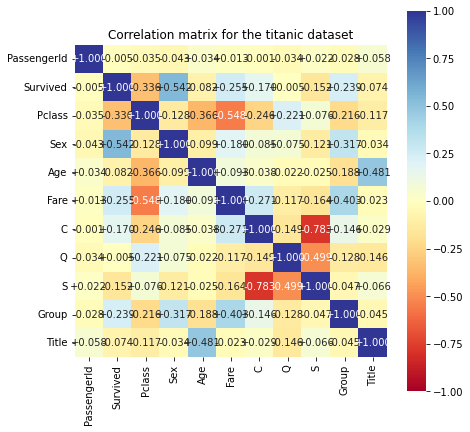

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(titanic.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the titanic dataset")

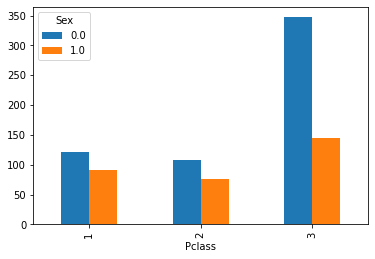

In [ ]:
genre_class = titanic[titanic['Survived'].isin([1])]
genre_class = pd.crosstab(titanic['Pclass'], titanic['Sex'])
genre_class.plot(kind='bar')

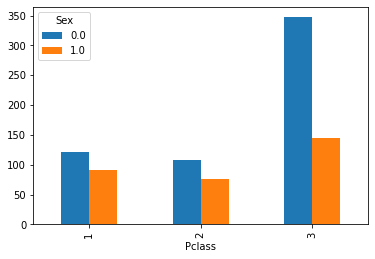

In [ ]:
age = titanic[titanic['Survived'].isin([1])]
genre_class = pd.crosstab(titanic['Pclass'], titanic['Sex'])
genre_class.plot(kind='bar')

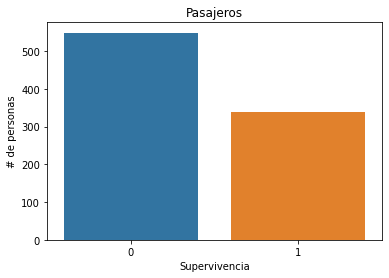

In [ ]:
fig_sobrevivientes = plt.figure(figsize=(6,4))

sns.countplot(data=titanic, x = "Survived")
plt.title('Pasajeros');
plt.xlabel('Supervivencia');
plt.ylabel('# de personas');

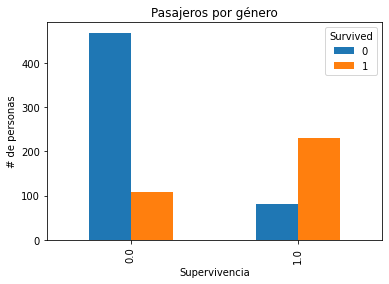

In [ ]:
genre_class = pd.crosstab(titanic['Sex'], titanic['Survived'])
genre_class.plot(kind='bar')
plt.title('Pasajeros por género');
plt.xlabel('Supervivencia');
plt.ylabel('# de personas');

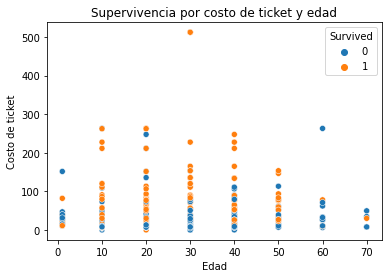

In [ ]:
sns.scatterplot(x = 'AgeGroup', y = 'Fare', data  = titanic, hue = 'Survived')
plt.title('Supervivencia por costo de ticket y edad');
plt.xlabel('Edad');
plt.ylabel('Costo de ticket');

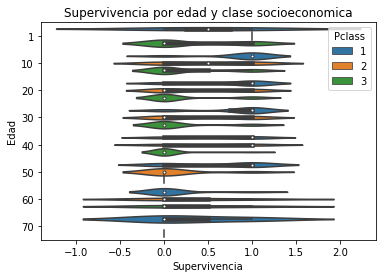

In [ ]:
sns.violinplot(x = 'Survived', y = 'AgeGroup',hue = "Pclass", data  = titanic)
plt.title('Supervivencia por edad y clase socioeconomica');
plt.xlabel('Supervivencia');
plt.ylabel('Edad');

Filter: AGE

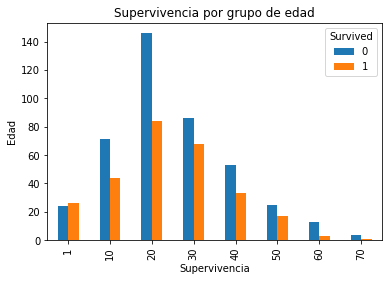

In [ ]:
age_surv = pd.crosstab(titanic['AgeGroup'], titanic['Survived'])
age_surv.plot(kind='bar')
plt.title('Supervivencia por grupo de edad');
plt.xlabel('Supervivencia');
plt.ylabel('Edad');

In [ ]:
#age_surv = titanic[titanic['Age']<=16]
#age_surv = pd.crosstab(age_surv['Age'], age_surv['Survived'])
#age_surv.plot(kind='bar')

In [ ]:
#age_surv = titanic.loc[(titanic['Age']<=45) & (titanic['Age']>16),]
#age_surv = pd.crosstab(age_surv['Age'], age_surv['Survived'])
#age_surv.plot(kind='bar')

In [ ]:
#age_surv = titanic[titanic['Age']>45]
#age_surv = pd.crosstab(age_surv['Age'], age_surv['Survived'])
#age_surv.plot(kind='bar')

In [ ]:
notalone = titanic.duplicated(subset=['Ticket'],keep=False)
titanic["alone"] = notalone

n_alone = titanic[titanic['alone'].isin([True])]
y_alone = titanic[titanic['alone'].isin([False])]
no_alone = n_alone['Survived'].value_counts(normalize=True)
si_alone = y_alone['Survived'].value_counts(normalize=True)

In [ ]:
no_alone

1    0.517544
0    0.482456
Name: Survived, dtype: float64

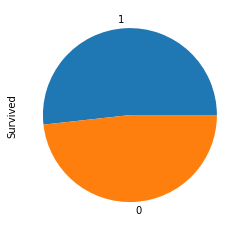

In [ ]:
no_alone.plot.pie()

In [ ]:
si_alone

0    0.702011
1    0.297989
Name: Survived, dtype: float64

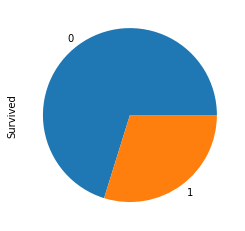

In [ ]:
si_alone.plot.pie()

([<matplotlib.patches.Wedge at 0x7f69d2a73c10>,
 [Text(-0.6521730840895089, 0.885816159476208, '1'),
  Text(0.6521731670256007, -0.8858160984153528, '0')])

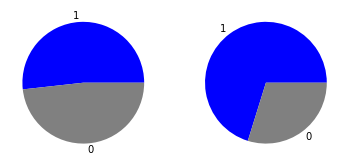

In [ ]:
labels = ["1","0"]
colours = {'1': 'blue',
           '0': 'gray'}

fig, ax = plt.subplots(1, 2)

ax[0].pie(no_alone,
          labels=labels,
          colors=[colours[key] for key in labels])

ax[1].pie(si_alone,
          labels=labels,
          colors=[colours[key] for key in labels])